findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei


findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not foun

分类器1 AUC: 0.000
分类器2 AUC: 0.000
AUC差值: 0.000
Z统计量: 0.000
P值: 1.000
差异显著性: 不显著


findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not foun

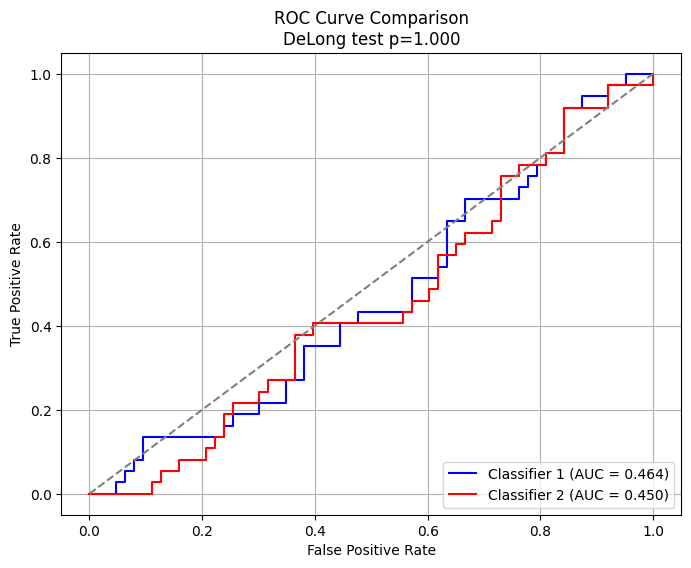

In [7]:
import numpy as np
from scipy import stats
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

def compute_midrank(x):
    """计算mid-rank"""
    J = np.argsort(x)
    Z = x[J]
    N = len(x)
    T = np.zeros(N, dtype=float)  # 修改此处
    i = 0
    while i < N:
        j = i
        while j < N and Z[j] == Z[i]:
            j += 1
        T[i:j] = 0.5*(i + j - 1)
        i = j
    T2 = np.empty(N, dtype=float)  # 修改此处
    T2[J] = T + 1
    return T2

def compute_auc(rank_pos, n_pos, n_neg):
    """根据mid-rank计算AUC"""
    return (rank_pos.sum() - n_pos*(n_pos+1)/2) / (n_pos*n_neg)

def delong_test(y_true, pred1_scores, pred2_scores):
    """
    执行DeLong检验比较两个分类器的AUC
    
    参数:
    y_true: 真实标签 (0/1)
    pred1_scores: 第一个分类器的预测概率
    pred2_scores: 第二个分类器的预测概率
    
    返回:
    z_score: Z统计量
    p_value: p值
    auc1: 第一个分类器的AUC
    auc2: 第二个分类器的AUC
    """
    # 转换为numpy数组
    y_true = np.array(y_true)
    pred1_scores = np.array(pred1_scores)
    pred2_scores = np.array(pred2_scores)
    
    # 分离正负样本
    pos_mask = y_true == 1
    neg_mask = y_true == 0
    
    n_pos = np.sum(pos_mask)
    n_neg = np.sum(neg_mask)
    
    # 计算两个预测器的mid-ranks
    ranks1_pos = compute_midrank(pred1_scores[pos_mask])
    ranks1_neg = compute_midrank(pred1_scores[neg_mask])
    ranks2_pos = compute_midrank(pred2_scores[pos_mask])
    ranks2_neg = compute_midrank(pred2_scores[neg_mask])
    
    # 计算AUC
    auc1 = compute_auc(ranks1_pos, n_pos, n_neg)
    auc2 = compute_auc(ranks2_pos, n_pos, n_neg)
    
    # 计算方差
    V01 = (ranks1_pos - ranks2_pos) / n_neg
    V10 = (ranks1_neg - ranks2_neg) / n_pos
    
    var_auc = np.var(V01) / n_pos + np.var(V10) / n_neg
    
    # 计算Z统计量和p值
    z_score = (auc1 - auc2) / np.sqrt(var_auc)
    p_value = 2 * (1 - stats.norm.cdf(abs(z_score)))
    
    return z_score, p_value, auc1, auc2

# 使用示例
def example_usage():
    # 生成示例数据
    np.random.seed(42)
    n_samples = 100
    y_true = np.random.binomial(1, 0.4, n_samples)
    
    # 模拟两个分类器的预测概率
    pred1_scores = np.random.random(n_samples)
    pred2_scores = np.random.random(n_samples)
    
    # 执行DeLong检验
    z_score, p_value, auc1, auc2 = delong_test(y_true, pred1_scores, pred2_scores)
    
    print(f"分类器1 AUC: {auc1:.3f}")
    print(f"分类器2 AUC: {auc2:.3f}")
    print(f"AUC差值: {abs(auc1-auc2):.3f}")
    print(f"Z统计量: {z_score:.3f}")
    print(f"P值: {p_value:.3f}")
    print(f"差异显著性: {'显著' if p_value < 0.05 else '不显著'}")

# 可视化比较
def plot_roc_comparison(y_true, pred1_scores, pred2_scores):
    
    
    # 计算ROC曲线
    fpr1, tpr1, _ = roc_curve(y_true, pred1_scores)
    fpr2, tpr2, _ = roc_curve(y_true, pred2_scores)
    
    # 计算AUC
    roc_auc1 = auc(fpr1, tpr1)
    roc_auc2 = auc(fpr2, tpr2)
    
    # 执行DeLong检验
    z_score, p_value, _, _ = delong_test(y_true, pred1_scores, pred2_scores)
    
    # 绘制ROC曲线
    plt.figure(figsize=(8, 6))
    plt.plot(fpr1, tpr1, color='blue',
             label=f'Classifier 1 (AUC = {roc_auc1:.3f})')
    plt.plot(fpr2, tpr2, color='red',
             label=f'Classifier 2 (AUC = {roc_auc2:.3f})')
    plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
    
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve Comparison\nDeLong test p={p_value:.3f}')
    plt.legend(loc='lower right')
    plt.grid(True)
    plt.show()

example_usage()
np.random.seed(42)
n_samples = 100
y_true = np.random.binomial(1, 0.4, n_samples)
    
# 模拟两个分类器的预测概率
pred1_scores = np.random.random(n_samples)
pred2_scores = np.random.random(n_samples)
plot_roc_comparison(y_true, pred1_scores, pred2_scores)

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.metrics import roc_curve, roc_auc_score
from scipy.stats import norm
import warnings
warnings.filterwarnings('ignore')

def delong_roc_test(y_true, y_pred1, y_pred2):
    """
    DeLong检验实现
    
    参数:
    y_true: 真实标签
    y_pred1: 模型1的预测概率
    y_pred2: 模型2的预测概率
    
    返回:
    z_score: Z统计量
    p_value: p值
    """
    def compute_covariance(predictions, labels):
        n_samples = len(labels)
        pos_indices = np.where(labels == 1)[0]
        neg_indices = np.where(labels == 0)[0]
        n_pos = len(pos_indices)
        n_neg = len(neg_indices)
        
        pos_predictions = predictions[pos_indices]
        neg_predictions = predictions[neg_indices]
        
        # 计算V10和V01
        v10 = np.zeros(n_pos)
        v01 = np.zeros(n_neg)
        
        for i in range(n_pos):
            v10[i] = np.sum(pos_predictions[i] > neg_predictions) / n_neg
        
        for i in range(n_neg):
            v01[i] = np.sum(pos_predictions > neg_predictions[i]) / n_pos
        
        # 计算AUC
        auc = np.mean(v10)
        
        # 计算方差
        s10 = np.var(v10) / n_pos
        s01 = np.var(v01) / n_neg
        
        return auc, s10, s01

    # 计算两个模型的AUC和方差
    auc1, s10_1, s01_1 = compute_covariance(y_pred1, y_true)
    auc2, s10_2, s01_2 = compute_covariance(y_pred2, y_true)
    
    # 计算协方差
    n_pos = np.sum(y_true == 1)
    n_neg = np.sum(y_true == 0)
    
    # 计算Z统计量
    var = s10_1 + s01_1 + s10_2 + s01_2
    z_score = (auc1 - auc2) / np.sqrt(var)
    p_value = 2 * (1 - norm.cdf(abs(z_score)))
    
    return z_score, p_value

def compare_models_performance(models_dict, datasets_dict, dataset_names=None):
    """
    比较多个模型在多个数据集上的性能
    
    参数:
    models_dict: 字典，包含模型名称和模型对象
    datasets_dict: 字典，包含数据集名称和(X, y)元组
    dataset_names: 数据集名称列表，如果为None则使用datasets_dict的键
    
    返回:
    results_df: 包含所有比较结果的DataFrame
    """
    if dataset_names is None:
        dataset_names = list(datasets_dict.keys())
    
    results = []
    
    # 存储所有预测结果用于后续分析
    all_predictions = {model_name: {dataset: None for dataset in dataset_names} 
                      for model_name in models_dict.keys()}
    
    # 计算每个模型在每个数据集上的AUC
    for dataset_name in dataset_names:
        X, y = datasets_dict[dataset_name]
        
        for model_name, model in models_dict.items():
            try:
                y_pred = model.predict_proba(X)[:, 1]
                all_predictions[model_name][dataset_name] = (y, y_pred)
                auc = roc_auc_score(y, y_pred)
                results.append({
                    'Dataset': dataset_name,
                    'Model': model_name,
                    'AUC': auc
                })
            except Exception as e:
                print(f"Error with {model_name} on {dataset_name}: {str(e)}")
    
    # 进行DeLong检验
    model_names = list(models_dict.keys())
    for i in range(len(model_names)):
        for j in range(i+1, len(model_names)):
            model1, model2 = model_names[i], model_names[j]
            
            for dataset in dataset_names:
                if (all_predictions[model1][dataset] is not None and 
                    all_predictions[model2][dataset] is not None):
                    y_true = all_predictions[model1][dataset][0]
                    y_pred1 = all_predictions[model1][dataset][1]
                    y_pred2 = all_predictions[model2][dataset][1]
                    
                    z_score, p_value = delong_roc_test(y_true, y_pred1, y_pred2)
                    results.append({
                        'Dataset': dataset,
                        'Comparison': f'{model1} vs {model2}',
                        'Z-score': z_score,
                        'P-value': p_value
                    })
    
    return pd.DataFrame(results)

def plot_model_comparison(results_df, figsize=(15, 10)):
    """
    可视化模型比较结果
    
    参数:
    results_df: compare_models_performance函数返回的DataFrame
    figsize: 图形大小
    """
    plt.figure(figsize=figsize)
    
    # 1. AUC比较图
    plt.subplot(2, 2, 1)
    auc_data = results_df[results_df['AUC'].notna()]
    sns.barplot(x='Dataset', y='AUC', hue='Model', data=auc_data)
    plt.title('AUC Comparison Across Datasets')
    plt.xticks(rotation=45)
    
    # 2. 统计显著性热图
    plt.subplot(2, 2, 2)
    pivot_data = results_df[results_df['P-value'].notna()].pivot(
        index='Dataset', columns='Comparison', values='P-value')
    sns.heatmap(pivot_data, annot=True, cmap='RdYlGn_r', center=0.05)
    plt.title('P-values from DeLong Test')
    
    # 3. ROC曲线比较
    plt.subplot(2, 2, 3)
    for model_name in results_df['Model'].unique():
        if pd.isna(model_name):
            continue
        model_data = results_df[results_df['Model'] == model_name]
        plt.errorbar(x=range(len(model_data)), 
                    y=model_data['AUC'], 
                    label=model_name,
                    marker='o')
    plt.xticks(range(len(results_df['Dataset'].unique())), 
               results_df['Dataset'].unique(), rotation=45)
    plt.title('AUC Trends Across Datasets')
    plt.legend()
    
    # 4. P值分布图
    plt.subplot(2, 2, 4)
    p_values = results_df[results_df['P-value'].notna()]['P-value']
    sns.histplot(p_values, bins=20)
    plt.axvline(x=0.05, color='r', linestyle='--', label='α=0.05')
    plt.title('Distribution of P-values')
    plt.legend()
    
    plt.tight_layout()
    plt.show()

# 使用示例：
"""
# 假设你有以下数据和模型：
model1 = ... # 使用特征A训练的模型
model2 = ... # 使用特征B训练的模型
model3 = ... # 使用特征A+B训练的模型

# 准备数据集
datasets = {
    'Internal_Val': (X_val, y_val),
    'External_Val_1': (X_ext1, y_ext1),
    'External_Val_2': (X_ext2, y_ext2),
    'External_Val_3': (X_ext3, y_ext3)
}

# 定义模型字典
models = {
    'Model_A': model1,
    'Model_B': model2,
    'Model_AB': model3
}

# 进行比较
results = compare_models_performance(models, datasets)

# 可视化结果
plot_model_comparison(results)

# 打印详细结果
print("\nDetailed Results:")
print(results)
"""